In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [3]:
#Loading the dataset
df = pd.read_csv('/Users/SAURABH/Saurabh patil/DATA SCIENCE/KNN/zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
#Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 13.9+ KB


# Since number of columns are more, let's use PCA

In [5]:
#Scaling the data (leaving out the target variable, and the taking only the numerical data for input)
df1= df.iloc[:,1:17]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                     #Normalised dataset

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 16)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[-2.53525586, -0.26027764,  1.24184209, ...,  0.46003753,
         0.13353213,  0.09036509],
       [-2.87735435, -0.40154709, -0.1000181 , ..., -0.01872462,
        -0.02855448, -0.06995038],
       [ 1.76100295,  3.70559205, -0.18010521, ...,  0.24519814,
        -0.00710216,  0.03432821],
       ...,
       [-2.81897453,  0.10708083,  0.13685166, ..., -0.03421561,
        -0.04553159, -0.02909899],
       [ 2.01881534, -1.25779288,  1.40920411, ..., -0.50614542,
        -0.22293974,  0.0170063 ],
       [ 2.04997054, -1.90737976, -2.49732162, ...,  0.23108799,
         0.13215847, -0.03497545]])

In [7]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.29191091, 0.20882904, 0.14778223, 0.07693359, 0.05962114,
       0.04662709, 0.03517581, 0.03202669, 0.02798703, 0.02374091,
       0.0173489 , 0.01317047, 0.00809636, 0.00737139, 0.00226697,
       0.00111146])

In [8]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([29.19, 50.07, 64.85, 72.54, 78.5 , 83.16, 86.68, 89.88, 92.68,
       95.05, 96.78, 98.1 , 98.91, 99.65, 99.88, 99.99])

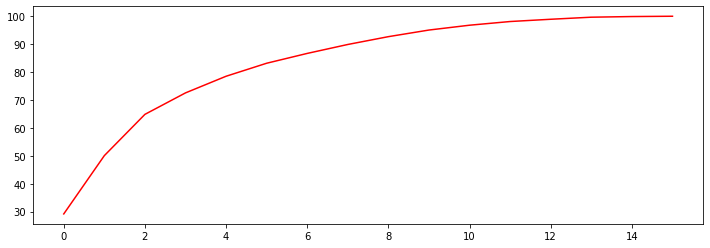

In [10]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

Selecting first 14 PCAs out of total 16

In [11]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:14],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14']),
                     df[['type']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,type
0,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767,-0.041032,-0.301902,1.287573,0.250864,-0.137726,-0.725658,-0.534541,0.460038,1
1,-2.877354,-0.401547,-0.100018,-0.014988,-0.308969,-0.627116,0.796777,0.345511,-0.552024,0.192473,0.211313,-0.145765,-0.087887,-0.018725,1
2,1.761003,3.705592,-0.180105,0.578327,-0.327066,-0.379035,-0.560420,-0.200556,-0.158270,-0.511661,-0.282661,-0.108516,0.090267,0.245198,4
3,-2.535256,-0.260278,1.241842,-1.065734,-0.296433,0.261767,-0.041032,-0.301902,1.287573,0.250864,-0.137726,-0.725658,-0.534541,0.460038,1
4,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023,-0.144118,0.065897,-0.119328,-0.445570,-0.117144,-0.159293,0.036293,-0.034216,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-2.764120,-0.065219,-0.409317,0.151818,-0.235706,-0.786741,0.910330,0.476138,0.099124,0.048053,0.514294,-0.101619,0.153061,-0.265474,1
97,1.667523,-3.219581,2.723445,0.743239,2.290063,-0.896837,1.661100,-1.217305,-0.182554,-0.242038,-0.558083,-0.298778,0.514703,0.539334,6
98,-2.818975,0.107081,0.136852,-1.178338,0.147460,0.069023,-0.144118,0.065897,-0.119328,-0.445570,-0.117144,-0.159293,0.036293,-0.034216,1
99,2.018815,-1.257793,1.409204,0.715264,-1.014103,-0.963336,0.479793,1.411127,1.790623,-0.041930,0.337558,0.855498,0.513896,-0.506145,7


In [12]:
array = finalDf.values
X = array[:,0:14]
Y = array[:,14]

# Selecting the model validation technique

### Trial 1 : Train Test split approach

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
np.round(result, 4)

0.9677

### Trial 2 : Cross Validation approach

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=kfold)
print('Result:',np.round(results.mean(),4),'\n','\n','Standard dev:',np.round(results.std(),4))

Result: 0.96 
 
 Standard dev: 0.0663


In [15]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = LeaveOneOut()
model = LogisticRegression(max_iter=400)
results = cross_val_score(model, X, Y, cv=loocv)
print('Result:',np.round(results.mean(),4),'\n','\n','Standard dev:',np.round(results.std(),4))

Result: 0.9604 
 
 Standard dev: 0.195


# Hence, Train Test Split is the best model vaidation technique here, so we'll proceed with that

# KNN Classification

Let's use Grid search CV to find out best value for K

In [16]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.9504761904761905
{'n_neighbors': 1}


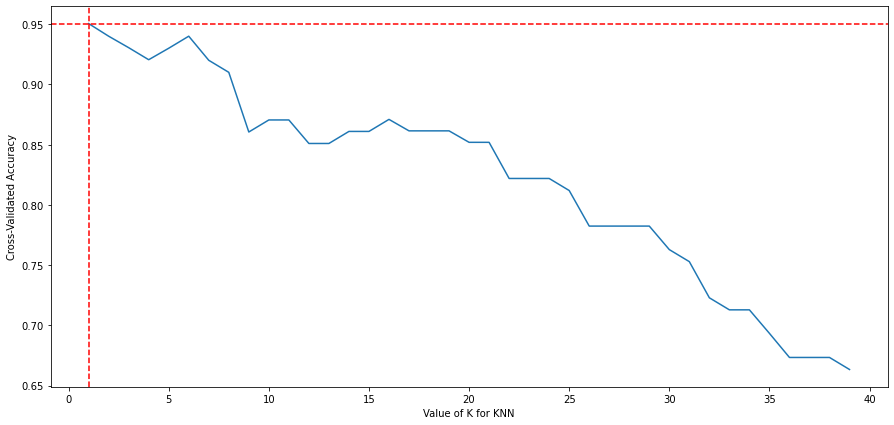

In [17]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.9504761904761905, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Hence K=1 is the best value, so we'll make the model using that.

In [18]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=1) #making the model
model.fit(X_train , Y_train) #training the model
y_pred = model.predict(X_test) #predicting on the test dataset
acc = accuracy_score(Y_test, y_pred) * 100 
print("Accuracy =", acc)

Accuracy = 93.54838709677419


# SVM Classification

In [19]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

Let's use Grid search CV to find out best value for params

In [20]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_

({'C': 1, 'kernel': 'linear'}, 0.97)

In [21]:
#SVM Clasification
clf = SVC(C= 1, kernel='linear') #building the model
clf.fit(X_train , Y_train) #training the model
y_pred = clf.predict(X_test) #predicting on test dataset
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 96.7741935483871


# Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

Trial-1: Bagging



In [22]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


Trial-2: Random Forest

In [23]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


Trial-3: Boosting

In [24]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 87.09677419354838


Trial-4: Stacking

In [25]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [26]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 93.54838709677419


In [27]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


In [28]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 96.7741935483871


In [29]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 87.09677419354838


In [30]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 90.32258064516128


# Hence, we can say that SVM is the best predicting model for this dataset